# To build a model for AlexNet Convolution neural network:


In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Input

In [5]:
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.layers import Flatten

In [7]:
from tensorflow.keras.layers import Conv2D

In [8]:
from tensorflow.keras.layers import MaxPooling2D

In [9]:
from tensorflow.keras.layers import Dropout

In [10]:
from tensorflow.keras.layers import LeakyReLU

In [11]:
from tensorflow.keras.layers import Activation

In [12]:
from tensorflow.keras.optimizers import Adam

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(96))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(32))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 69984)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17916160  
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1448 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [21]:
img_dims = 150
epochs = 100
batch_size = 50

In [ ]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 28 steps, validate for 25 steps
Epoch 1/100
28/28 [==============================] - 202s 7s/step - loss: 1.2498 - accuracy: 0.3683 - Precision: 0.2442 - Recall: 0.0234 - TruePositives: 21.0000 - TrueNegatives: 1727.0000 - FalsePositives: 65.0000 - FalseNegatives: 875.0000 - val_loss: 1.0755 - val_accuracy: 0.2625 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_TruePositives: 0.0000e+00 - val_TrueNegatives: 1600.0000 - val_FalsePositives: 0.0000e+00 - val_FalseNegatives: 800.0000
Epoch 2/100
28/28 [==============================] - 162s 6s/step - loss: 1.0501 - accuracy: 0.4319 - Precision: 0.5750 - Recall: 0.0770 - TruePositives: 69.0000 - TrueNegatives: 1741.0000 - FalsePositives: 51.0000 - FalseNegatives: 827.0000 - val_loss: 0.8023 - val_accuracy: 0.7700 - val_Precision: 0.9409 - val_Recall: 0.2387 - val_TruePositives: 191.0000 - val_TrueNegatives: 1588.0000 - val_FalsePositives: 12.0000 - val_FalseNegatives: 60

In [23]:
import matplotlib.pyplot as plt

In [24]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


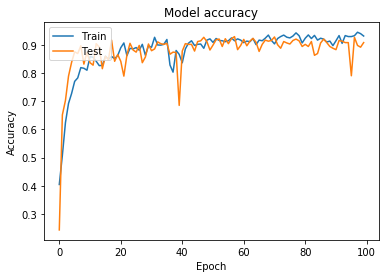

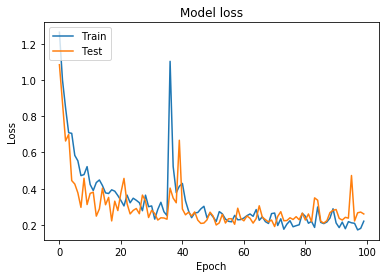

In [25]:
graph()

In [26]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
  ...
    to  
  ['...']
41/41 [==============================] - 36s 882ms/step - loss: 0.2634 - accuracy: 0.9045 - Precision: 0.9062 - Recall: 0.9006 - TruePositives: 1160.0000 - TrueNegatives: 2456.0000 - FalsePositives: 120.0000 - FalseNegatives: 128.0000
Test Accuracy: 90.45031070709229


In [27]:
precision=scores[2]
recall=scores[3]
true_positives=scores[3]
true_negatives=scores[4]
false_positives=scores[5]
false_negatives=scores[6]

In [28]:
confution_matrix=[[true_positives,false_positives],[false_negatives,true_negatives]]

In [29]:
print(f"Accuracy                     : {scores[1]*100}")
print("")
print("Confution Matrix             : ",confution_matrix)
print("")
print("precision Score              : ",precision)
print("")
print("Recall or Sensitivity Score  : ",recall)
print("")
f1=(precision*recall)/(precision+recall)
F1_Score=2*f1
print("F1 Score                     : ",F1_Score)
print("")
Specifisity=true_negatives/true_negatives+false_positives
print("Specifisity Score            : ",Specifisity)

Accuracy                     : 90.45031070709229

Confution Matrix             :  [[0.9006211, 2456.0], [120.0, 1160.0]]

precision Score              :  0.90625

Recall or Sensitivity Score  :  0.9006211

F1 Score                     :  0.9034267067909241

Specifisity Score            :  2457.0


In [30]:
import h5py

In [31]:
model.save('covid8.h5')

In [32]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [33]:
classifierLoad=tf.keras.models.load_model('covid8.h5')

In [34]:
import numpy as np

In [35]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('c.jpg',target_size=(224,224))

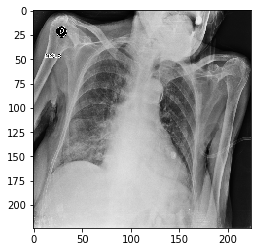

In [36]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [37]:
test_image=image.img_to_array(test_image)

In [38]:
test_image=np.expand_dims(test_image,axis=0)

In [39]:
result=classifierLoad.predict(test_image)

In [40]:
prediction = result[0]

In [41]:
classes=training_set.class_indices

In [42]:
classes

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [43]:
prediction=list(prediction)

In [44]:
prediction

[1.0, 0.0, 0.0]

In [45]:
classes=['COVID19', 'NORMAL', 'PNEUMONIA']

In [46]:
output=zip(classes,prediction)

In [47]:
output=dict(output)

In [48]:
output

{'COVID19': 1.0, 'NORMAL': 0.0, 'PNEUMONIA': 0.0}

In [49]:
if output['COVID19']==1.0 :
    print("COVID19")
elif output['NORMAL']==1.0:
    print("NORMAL")
elif output['PNEUMONIA']==1.0:
    print("PNEUMONIA")

COVID19
